In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20      # pandas zeigt mehr Zeilen an, 20
pd.options.display.max_columns = 8    # pandas zeigt mehr Spalten an, 8

# read in the csv file
df = pd.read_csv('Walmart.csv')

#print all the columns
print(df.columns)

# die Spalte Store wird für die Analyse nicht benötigt, da sie nur die Nummer des Stores enthält, daher wird sie auch weggelassen
df = df.drop('Store', axis=1)

# Die Spalte Date wird nicht benötigt, da sie nur das Datum enthält an dem die Daten erfasst wurden, daher wird sie auch weggelassen
df = df.drop('Date', axis=1)




Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [162]:
# Anhand verschiender Modelle wrd versucht die weekly_sales vorherzusagen

# 1. Lineare Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Die Spalte Weekly_Sales wird als Zielvariable definiert
y = df['Weekly_Sales']

# Die Restlichen Spalten werden als Features definiert
X = df.drop('Weekly_Sales', axis=1)

# Die Daten werden in Trainings- und Testdaten aufgeteilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Das Modell wird erstellt
lm = LinearRegression()

# Das Modell wird mit den Trainingsdaten trainiert
lm.fit(X_train,y_train)

# Die Vorhersage wird erstellt
predictions = lm.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
from sklearn import metrics
print('R2-Score:', metrics.r2_score(y_test, predictions))




R2-Score: 0.01643335509681909


R2-Score: -0.7886797573032711


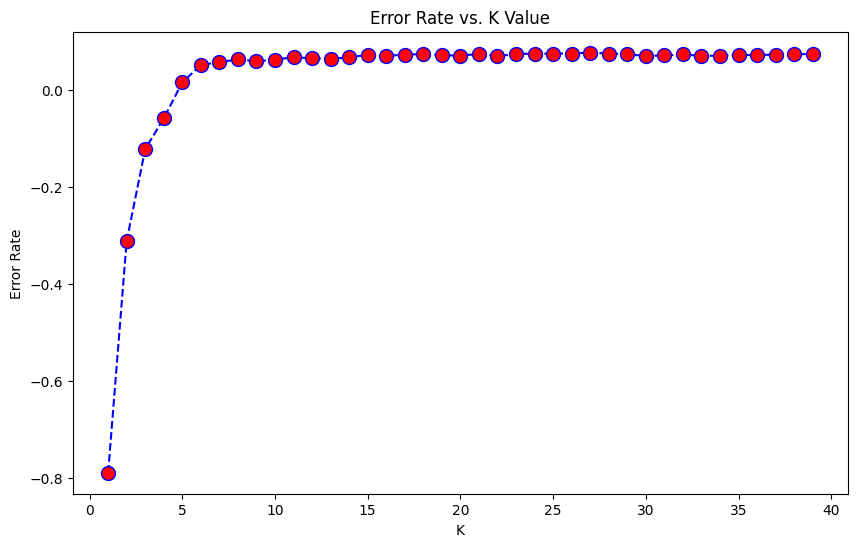

R2-Score: 0.072660790942222


In [163]:
# Da der R2-Score sehr niedrig ist, wird versucht mit einem KNN Modell versucht die Vorhersage zu verbessern

# 2. KNN
from sklearn.neighbors import KNeighborsRegressor





# Die Daten werden auf die gleiche Skala gebracht
scaler = StandardScaler()
scaler.fit(df.drop('Weekly_Sales',axis=1))
scaled_features = scaler.transform(df.drop('Weekly_Sales',axis=1))

# Die Daten werden in Trainings- und Testdaten aufgeteilt
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Weekly_Sales'],test_size=0.30)

# Das Modell wird erstellt
knn = KNeighborsRegressor(n_neighbors=1)

# Das Modell wird mit den Trainingsdaten trainiert
knn.fit(X_train,y_train)

# Die Vorhersage wird erstellt
pred = knn.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, pred))

# Da der R2-Score immer noch sehr niedrig ist, wird die beste Anzahl an Nachbarn für das Modell ermittelt
error_rate = []

# Mit einer for-Schleife wird für jeden Nachbarn der R2-Score berechnet
for i in range(1,40):
        
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(metrics.r2_score(y_test, pred_i))

# Die Ergebnisse werden in einem Plot dargestellt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
            markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# der Nachbar mit dem höchsten R2-Score wird ausgewählt und das Modell wird wieder erstellt

# Das Modell wird erstellt
knn = KNeighborsRegressor(n_neighbors=17)

# Das Modell wird mit den Trainingsdaten trainiert
knn.fit(X_train,y_train)

# Die Vorhersage wird erstellt
pred = knn.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, pred))





In [164]:
# Da der R2-Score immer noch sehr niedrig ist, wird versucht mit einem Random Forest Regressor Modell versucht die Vorhersage zu verbessern

# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Das Modell wird erstellt
rfc = RandomForestRegressor(n_estimators=200)

# Das Modell wird mit den Trainingsdaten trainiert
rfc.fit(X_train, y_train)

# Die Vorhersage wird erstellt
rfc_pred = rfc.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, rfc_pred))


R2-Score: 0.08979213897140381


R2-Score: -0.2986066140435386


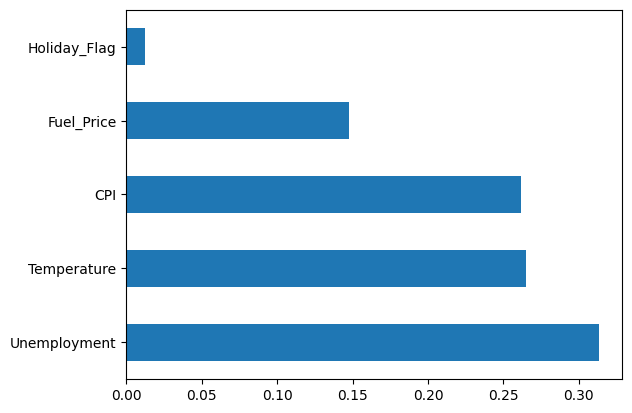

In [165]:
# EIn desciscion tree wird erstellt
from sklearn.tree import DecisionTreeRegressor

# Das Modell wird erstellt
dtree = DecisionTreeRegressor()

# Das Modell wird mit den Trainingsdaten trainiert
dtree.fit(X_train,y_train)

# Die Vorhersage wird erstellt
predictions = dtree.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, predictions))

# Die wichtigsten Features werden ermittelt
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



[Text(0.5, 0.875, 'Unemployment <= 0.538\nsquared_error = 322714332641.236\nsamples = 4504\nvalue = 1057410.086'),
 Text(0.25, 0.625, 'CPI <= 0.452\nsquared_error = 345131107658.235\nsamples = 3720\nvalue = 1101735.757'),
 Text(0.125, 0.375, 'Temperature <= 1.428\nsquared_error = 353719837943.492\nsamples = 1710\nvalue = 1203248.783'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Unemployment <= -0.613\nsquared_error = 321599061641.252\nsamples = 2010\nvalue = 1015373.929'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'CPI <= -0.983\nsquared_error = 162791578382.813\nsamples = 784\nvalue = 847089.297'),
 Text(0.625, 0.375, 'Unemployment <= 0.658\nsquared_error = 193772386626.034\nsamples = 546\nvalue = 903324.6'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Unemployment <= 0.607\nsquared_error = 67819337221.027\nsamples = 238\

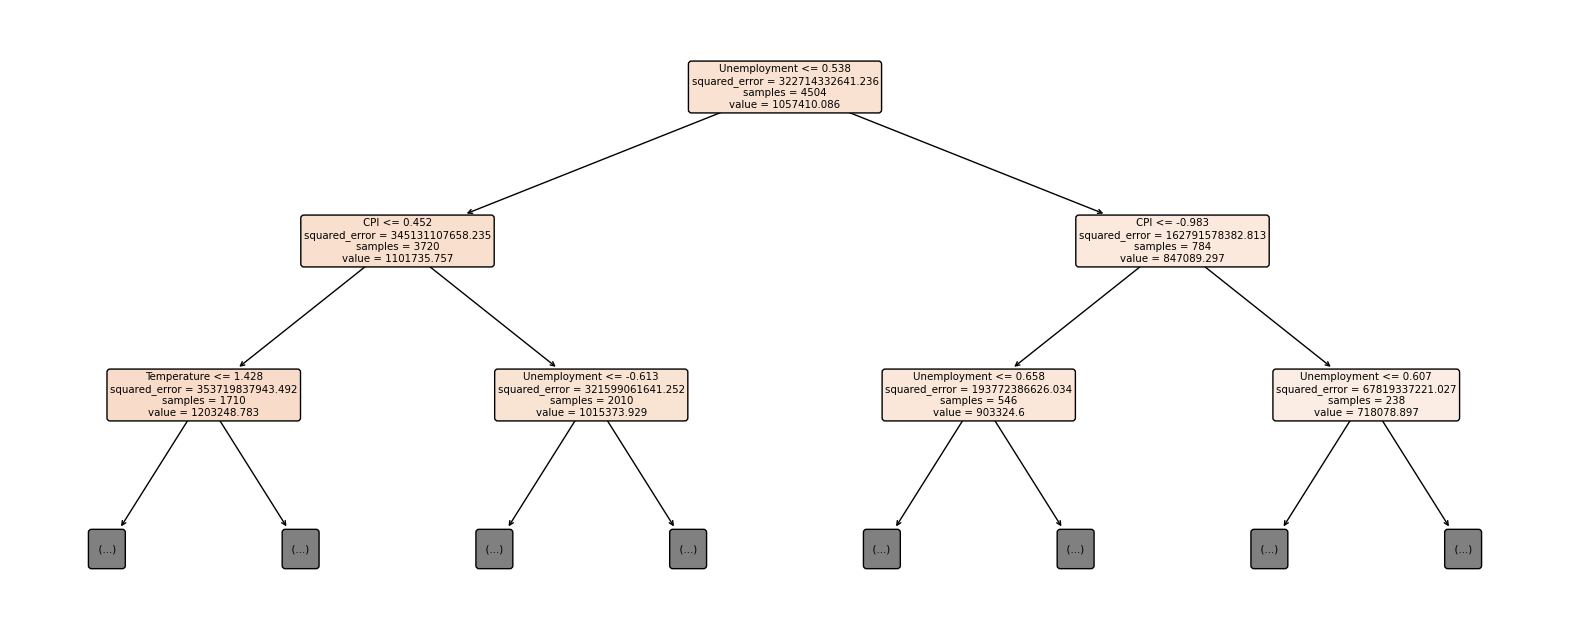

In [166]:
# ein kleiner decision tree mit 4 leaves wird gezeichnet
from sklearn import tree
plt.figure(figsize=(20,8))
tree.plot_tree(dtree, max_depth=2, filled=True, rounded=True, feature_names=X.columns)


In [167]:
# Da der der Holiday Flag sehr unbedeutend ist, werden die MOdelle ohne diesen erneut erstellt

# 4. KNN ohne Holiday Flag
from sklearn.neighbors import KNeighborsRegressor





# Die Daten werden auf die gleiche Skala gebracht
scaler = StandardScaler()
scaler.fit(df.drop(['Weekly_Sales', 'Holiday_Flag'],axis=1))

scaled_features = scaler.transform(df.drop(['Weekly_Sales', 'Holiday_Flag'],axis=1))

# Die Daten werden in Trainings- und Testdaten aufgeteilt
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Weekly_Sales'],test_size=0.30)

# Das Modell wird erstellt
knn = KNeighborsRegressor(n_neighbors=17)

# Das Modell wird mit den Trainingsdaten trainiert
knn.fit(X_train,y_train)

# Die Vorhersage wird erstellt
pred = knn.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, pred))



R2-Score: 0.08466176518288582


In [168]:
# 5. Random Forest Regressor ohne Holiday Flag
from sklearn.ensemble import RandomForestRegressor

# Das Modell wird erstellt
rfc = RandomForestRegressor(n_estimators=200)

# Das Modell wird mit den Trainingsdaten trainiert
rfc.fit(X_train, y_train)

# Die Vorhersage wird erstellt
rfc_pred = rfc.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, rfc_pred))



R2-Score: 0.11345081184198247


In [169]:
# 6. Decision Tree ohne Holiday Flag
from sklearn.tree import DecisionTreeRegressor

# Das Modell wird erstellt
dtree = DecisionTreeRegressor()

# Das Modell wird mit den Trainingsdaten trainiert
dtree.fit(X_train,y_train)

# Die Vorhersage wird erstellt
predictions = dtree.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, predictions))




R2-Score: -0.25927445721927067


[Text(0.5, 0.875, 'CPI <= 0.538\nsquared_error = 315378347864.702\nsamples = 4504\nvalue = 1039059.506'),
 Text(0.25, 0.625, 'Fuel_Price <= 0.452\nsquared_error = 340345759143.62\nsamples = 3716\nvalue = 1080018.453'),
 Text(0.125, 0.375, 'Holiday_Flag <= 1.637\nsquared_error = 352085582144.655\nsamples = 1732\nvalue = 1183465.426'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'CPI <= -0.613\nsquared_error = 312599589819.48\nsamples = 1984\nvalue = 989710.914'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Fuel_Price <= -0.895\nsquared_error = 152419807760.063\nsamples = 788\nvalue = 845907.924'),
 Text(0.625, 0.375, 'CPI <= 0.955\nsquared_error = 175304185006.859\nsamples = 607\nvalue = 899394.708'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'CPI <= 0.607\nsquared_error = 33906285124.752\nsamples = 181\nvalue = 666535.12'),


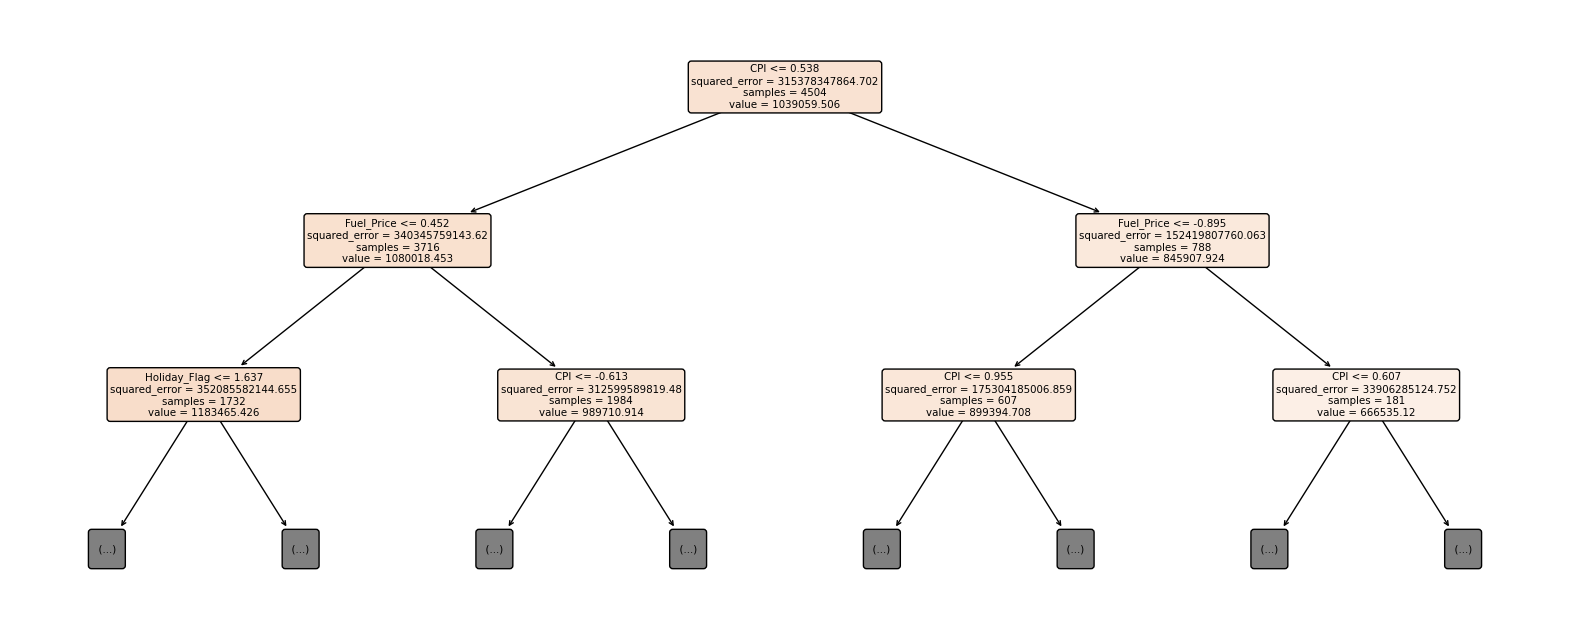

In [170]:
from sklearn import tree
plt.figure(figsize=(20,8))
tree.plot_tree(dtree, max_depth=2, filled=True, rounded=True, feature_names=X.columns)

In [171]:
# ein ensemble aus den 3 Modellen wird erstellt
from sklearn.ensemble import VotingRegressor

# Das Modell wird erstellt
ereg = VotingRegressor([('knn', knn), ('rf', rfc), ('dt', dtree)])

# Das Modell wird mit den Trainingsdaten trainiert
ereg = ereg.fit(X_train, y_train)

# Die Vorhersage wird erstellt
y_pred = ereg.predict(X_test)

# Die genauigkeit des Modells wird Mittels des R2-Scores berechnet
print('R2-Score:', metrics.r2_score(y_test, y_pred))




R2-Score: 0.1279389714976653
